In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\kidney.CSV")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
             'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
             'blood_glucose_random','blood_urea','serum_cretinine','sodium','potassium',
             'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
             'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
             'pedal_edema','anemia','class']

In [6]:
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_cretinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [7]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)

In [8]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:

data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'],inplace=True)
data['serum_cretinine'].fillna(data['serum_cretinine'],inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'],inplace=True)
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [10]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pus_cell', 'packed_cell_volume', 'white_blood_cell_count', 'class', 'appetite', 'anemia', 'hypertension', 'red_blood_cell_count', 'pedal_edema', 'pus_cell_clumps', 'diabetesmellitus', 'red_blood_cells', 'bacteria', 'coronary_artery_disease'}


In [11]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : pus_cell
Counter({'normal': 324, 'abnormal': 76})
************************************************************************************************************************

Columns : packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

Columns : white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7

In [12]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)


{'pus_cell', 'class', 'appetite', 'anemia', 'hypertension', 'pedal_edema', 'pus_cell_clumps', 'diabetesmellitus', 'red_blood_cells', 'bacteria', 'coronary_artery_disease'}


In [13]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']


In [14]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)
    

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

In [15]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'pus_cell', 'blood_glucose_random', 'class', 'appetite', 'hemoglobin', 'hypertension', 'pedal_edema', 'diabetesmellitus', 'coronary_artery_disease', 'blood_pressure', 'anemia', 'sodium', 'specific_gravity', 'sugar', 'albumin', 'red_blood_cells', 'age', 'pus_cell_clumps', 'serum_cretinine', 'blood_urea', 'potassium', 'id', 'bacteria'}


In [16]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns: pus_cell
Counter({1: 324, 0: 76})
************************************************************************************************************************

Continous Columns: blood_glucose_random
Counter({148.0365168539326: 44, 99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92.0: 6, 109.0: 6, 131.0: 6, 130.0: 6, 70.0: 5, 114.0: 5, 95.0: 5, 123.0: 5, 124.0: 5, 102.0: 5, 132.0: 5, 104.0: 5, 125.0: 5, 122.0: 5, 121.0: 4, 106.0: 4, 76.0: 4, 91.0: 4, 129.0: 4, 133.0: 4, 94.0: 4, 88.0: 4, 118.0: 4, 139.0: 4, 111.0: 4, 113.0: 4, 120.0: 4, 119.0: 4, 74.0: 3, 108.0: 3, 171.0: 3, 137.0: 3, 79.0: 3, 150.0: 3, 112.0: 3, 127.0: 3, 219.0: 3, 172.0: 3, 89.0: 3, 128.0: 3, 214.0: 3, 105.0: 3, 78.0: 3, 103.0: 3, 82.0: 3, 97.0: 3, 81.0: 3, 138.0: 2, 490.0: 2, 208.0: 2, 98.0: 2, 204.0: 2, 207.0: 2, 144.0: 2, 253.0: 2, 141.0: 2, 86.0: 2, 360.0: 2, 163.0: 2, 158.0: 2, 165.0: 2, 169.0: 2, 210.0: 2, 101.0: 2, 153.0: 2, 213.0: 2, 424.0: 2, 303.0: 2, 192.0: 2, 80.0: 2, 110.0: 2, 9

In [17]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'pus_cell', 'blood_glucose_random', 'class', 'appetite', 'hemoglobin', 'hypertension', 'pedal_edema', 'diabetesmellitus', 'coronary_artery_disease', 'blood_pressure', 'anemia', 'sodium', 'red_blood_cells', 'age', 'pus_cell_clumps', 'serum_cretinine', 'blood_urea', 'potassium', 'id', 'bacteria'}


In [18]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)


{'pus_cell', 'packed_cell_volume', 'blood_glucose_random', 'class', 'appetite', 'hemoglobin', 'hypertension', 'red_blood_cell_count', 'pedal_edema', 'diabetesmellitus', 'coronary_artery_disease', 'blood_pressure', 'anemia', 'white_blood_cell_count', 'sodium', 'red_blood_cells', 'age', 'pus_cell_clumps', 'serum_cretinine', 'blood_urea', 'potassium', 'id', 'bacteria'}


In [19]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(catcols)


['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [20]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [21]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':''})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [22]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

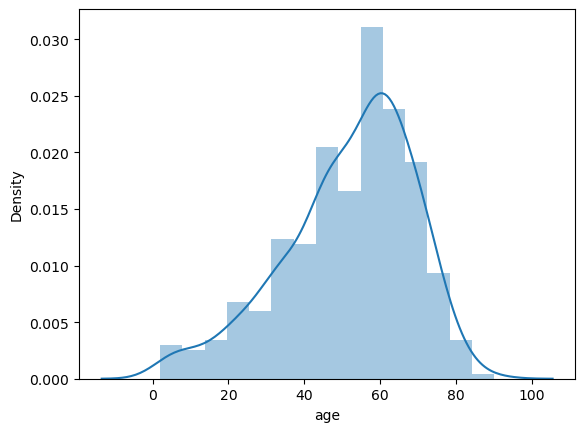

In [23]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter Plot')

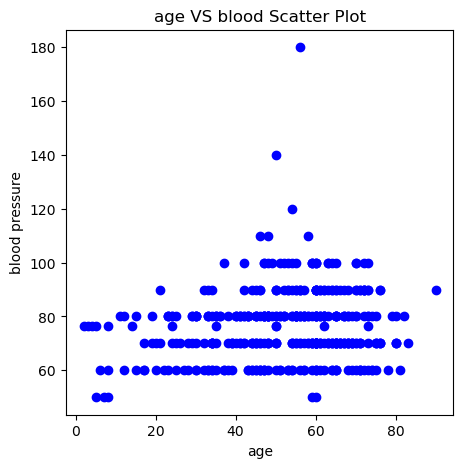

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age VS blood Scatter Plot")

TypeError: 'value' must be an instance of str or bytes, not a float

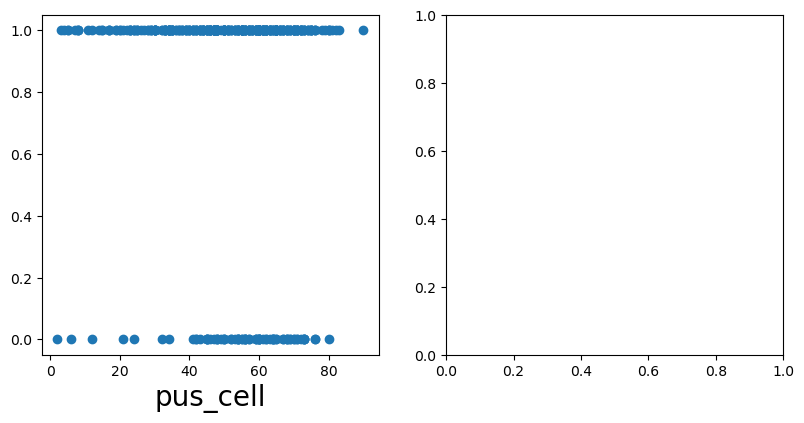

In [27]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

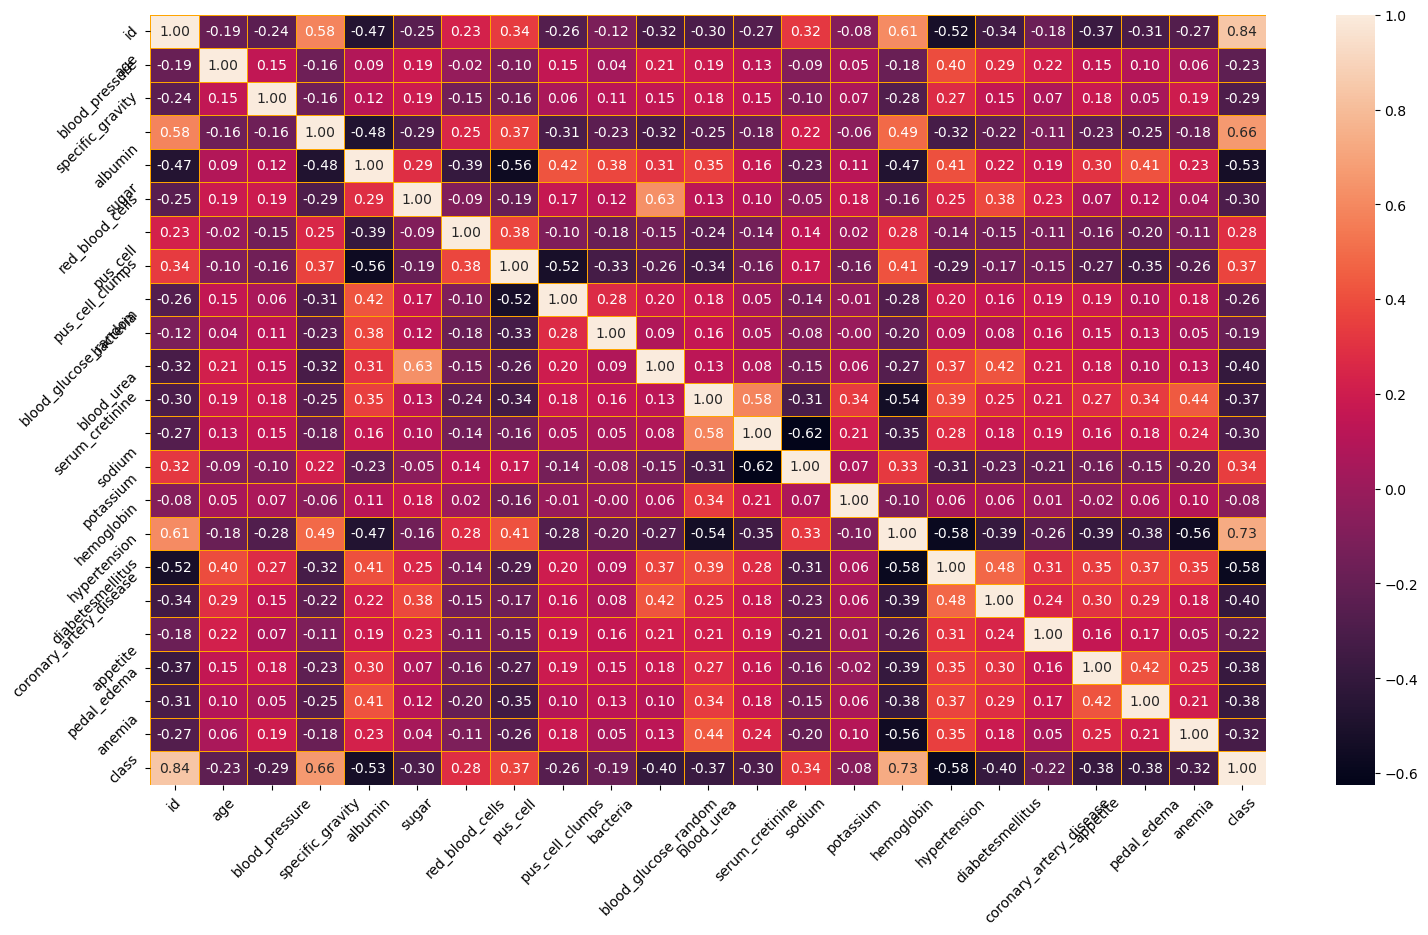

In [28]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

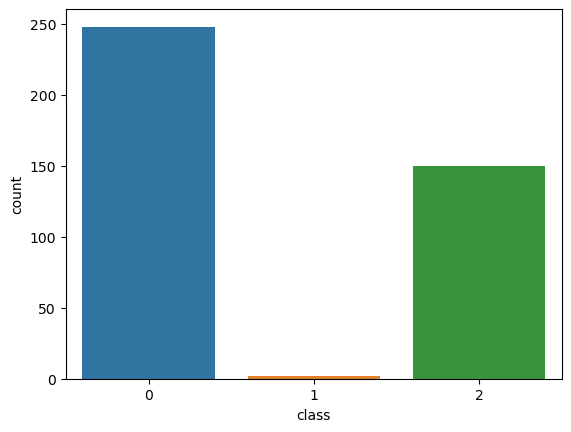

In [29]:
sns.countplot(data['class'])

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal=sc.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [31]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train
y_train

,class
205,0
354,2
3,0
264,2
194,0
...,...
299,2
22,0
72,0
15,0


In [34]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [36]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 5s 33ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 2/100
26/26 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 3/100
26/26 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 6/100
26/26 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 8/100
26/26 [=============================

Epoch 61/100
26/26 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 62/100
26/26 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 63/100
26/26 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 64/100
26/26 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 65/100
26/26 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 66/100
26/26 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 67/100
26/26 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 68/100
26/26 [========================

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [54]:
rfc.fit(x_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [40]:
y_predict = rfc.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_predict_train = rfc.predict(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
dtc.fit(x_train,y_train)

In [ ]:
y_predict= dtc.predict(x_test)
y_predict

In [ ]:
y_predict_train = dtc.predict(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

In [ ]:
from sklearn.metrices import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [ ]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

In [ ]:
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

In [ ]:
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

In [ ]:
classification.save("ckd.h5")

In [ ]:
y_pred = classification.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
def predict_exit(sample_value)
sample_value = np.array(sample_value)
sample_value = sample_value.reshape(1,-1)
sample_value = sc.transform(sample_value)
return classifier.predict(sample_value)

In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: low chance of CKD!')

In [ ]:
dfs = []
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
         ]
results = []
    names = []
    scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
    target_names = ['NO CKD','CKD']
    for name,model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_tain, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
return final

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels= ['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels= ['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels= ['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
bootstrap = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstrap.append(bootstrap)
    
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics = ['fit_time','score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_nofit.sort_values(by='values')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmodel_models_performance.png',dpi=300)


In [ ]:
pickle.dump(lgr, open('CKD.pkl','wb'))

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [ ]:
app = Flask(_name_)
model = pickle.load(open('CKD.pkl', 'rb'))

In [ ]:
@app.route('/')
def home():
    return render_template('home.html')


In [ ]:
@app.route('/Prediction',methods=['POST','GET'])

def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    input_features = [float(x) for x in request.form.values()]
    features_value = [np.array(input_features)]
    features_name = ['blood_urea', 'blood gulcose random', 'anemia', 'coronary_artery_disease', 'pus_cell', 'red_blood_cells', 'diabetesmellitus', 'pedel_edema']
    df = pd.DataFrame(features_value, columns=features_name)
    output = model.predict(df)

In [ ]:
return render_template('result.html', prediction_text=output)

In [ ]:
if _name_== '_main_':
    app.run(debug=True)